✅ File Loaded: WA_Fn-UseC_-HR-Employee-Attrition.csv

Dataset Shape: (1470, 35)

Columns:
 ['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

Missing Values:
 0

First 5 Rows:


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2



Encoded Columns: ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']

📊 Accuracy: 0.8741

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.97      0.93       247
           1       0.69      0.38      0.49        47

    accuracy                           0.87       294
   macro avg       0.79      0.68      0.71       294
weighted avg       0.86      0.87      0.86       294



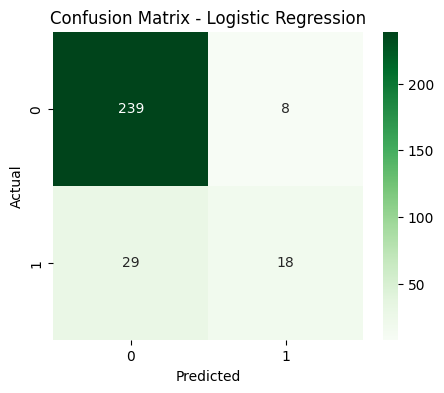

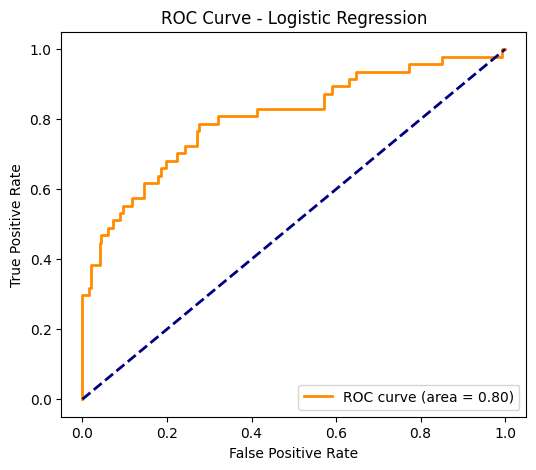

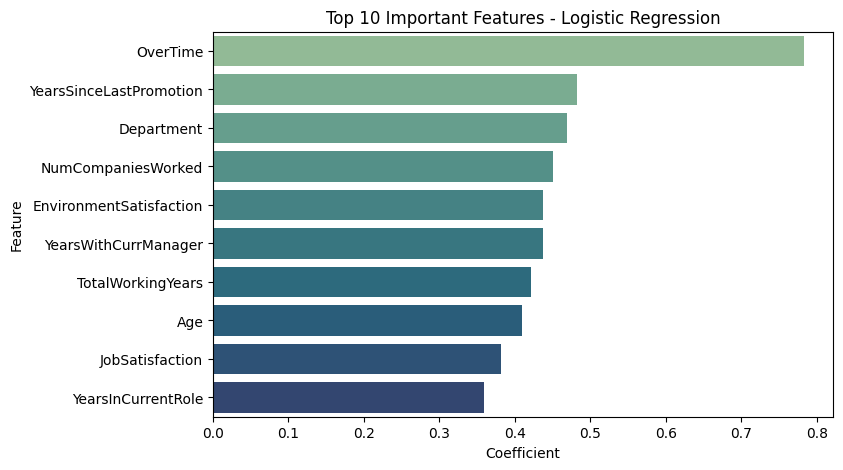


Top 10 Important Features:



,Feature,Coefficient
21,OverTime,0.782414
32,YearsSinceLastPromotion,0.482025
3,Department,0.469693
19,NumCompaniesWorked,0.450000
9,EnvironmentSatisfaction,0.437389
33,YearsWithCurrManager,0.436916
27,TotalWorkingYears,0.421299
0,Age,0.409446
15,JobSatisfaction,0.381800
31,YearsInCurrentRole,0.358666


In [2]:
# ============================================
# EMPLOYEE ATTRITION PREDICTION - 1.LOGISTIC REGRESSION (KAGGLE VERSION)
# ============================================

# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report, roc_curve, auc
)

# Step 2: Auto-detect and Load Dataset
base_path = "/kaggle/input/employee-attrition"
for file in os.listdir(base_path):
    if file.endswith(".csv"):
        file_path = os.path.join(base_path, file)
        print("✅ File Loaded:", file)
        df = pd.read_csv(file_path)
        break

# Step 3: Basic Exploration
print("\nDataset Shape:", df.shape)
print("\nColumns:\n", df.columns.tolist())
print("\nMissing Values:\n", df.isnull().sum().sum())
print("\nFirst 5 Rows:")
display(df.head())

# Step 4: Encode Categorical Columns
cat_cols = df.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

print("\nEncoded Columns:", cat_cols.tolist())

# Step 5: Define Features and Target
if 'Attrition' not in df.columns:
    raise ValueError("⚠️ Column 'Attrition' not found in dataset.")
X = df.drop("Attrition", axis=1)
y = df["Attrition"]

# Step 6: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Step 7: Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 8: Build & Train Logistic Regression Model
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

# Step 9: Make Predictions
y_pred = log_model.predict(X_test)
y_prob = log_model.predict_proba(X_test)[:, 1]

# Step 10: Evaluation Metrics
acc = accuracy_score(y_test, y_pred)
print("\n📊 Accuracy:", round(acc, 4))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Step 11: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Step 12: ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0,1], [0,1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc="lower right")
plt.show()

# Step 13: Feature Importance (Coefficients)
importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': abs(log_model.coef_[0])
}).sort_values(by='Coefficient', ascending=False).head(10)

plt.figure(figsize=(8,5))
sns.barplot(x='Coefficient', y='Feature', data=importance, palette='crest')
plt.title("Top 10 Important Features - Logistic Regression")
plt.show()

print("\nTop 10 Important Features:\n")
display(importance)


✅ File Loaded: WA_Fn-UseC_-HR-Employee-Attrition.csv

Dataset Shape: (1470, 35)

Missing Values: 0


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2



Encoded Columns: ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']

📊 Accuracy: 0.8469

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.98      0.92       247
           1       0.60      0.13      0.21        47

    accuracy                           0.85       294
   macro avg       0.73      0.56      0.56       294
weighted avg       0.81      0.85      0.80       294



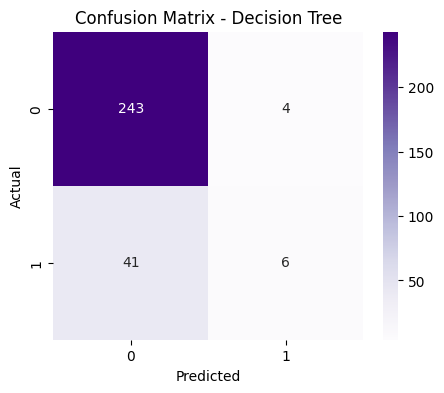

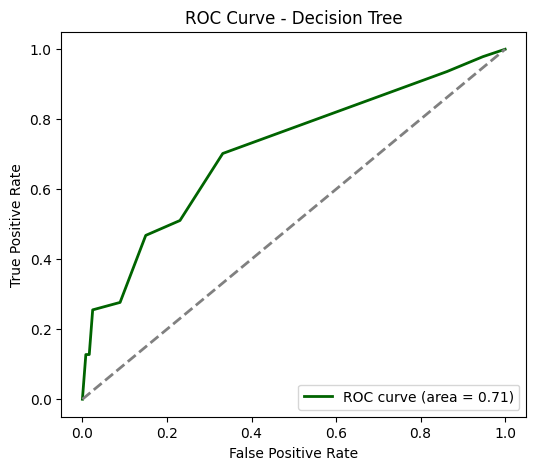

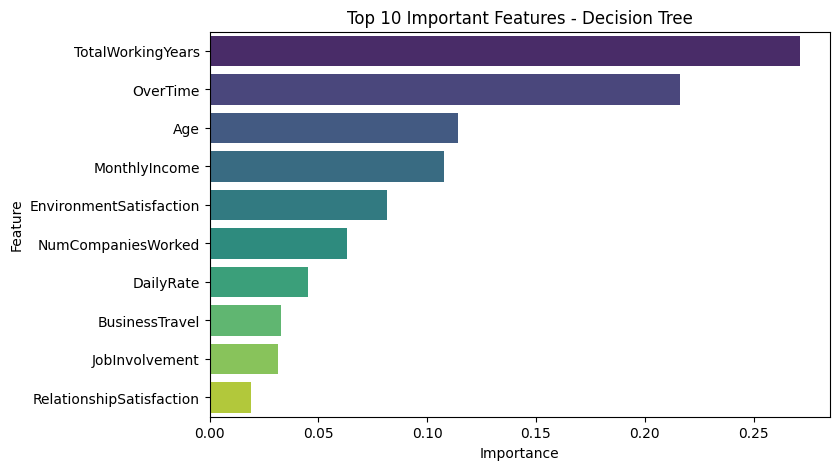


Top 10 Important Features:



,Feature,Importance
27,TotalWorkingYears,0.271420
21,OverTime,0.216108
0,Age,0.114364
17,MonthlyIncome,0.107759
9,EnvironmentSatisfaction,0.081448
19,NumCompaniesWorked,0.063057
2,DailyRate,0.045149
1,BusinessTravel,0.032609
12,JobInvolvement,0.031457
24,RelationshipSatisfaction,0.018947


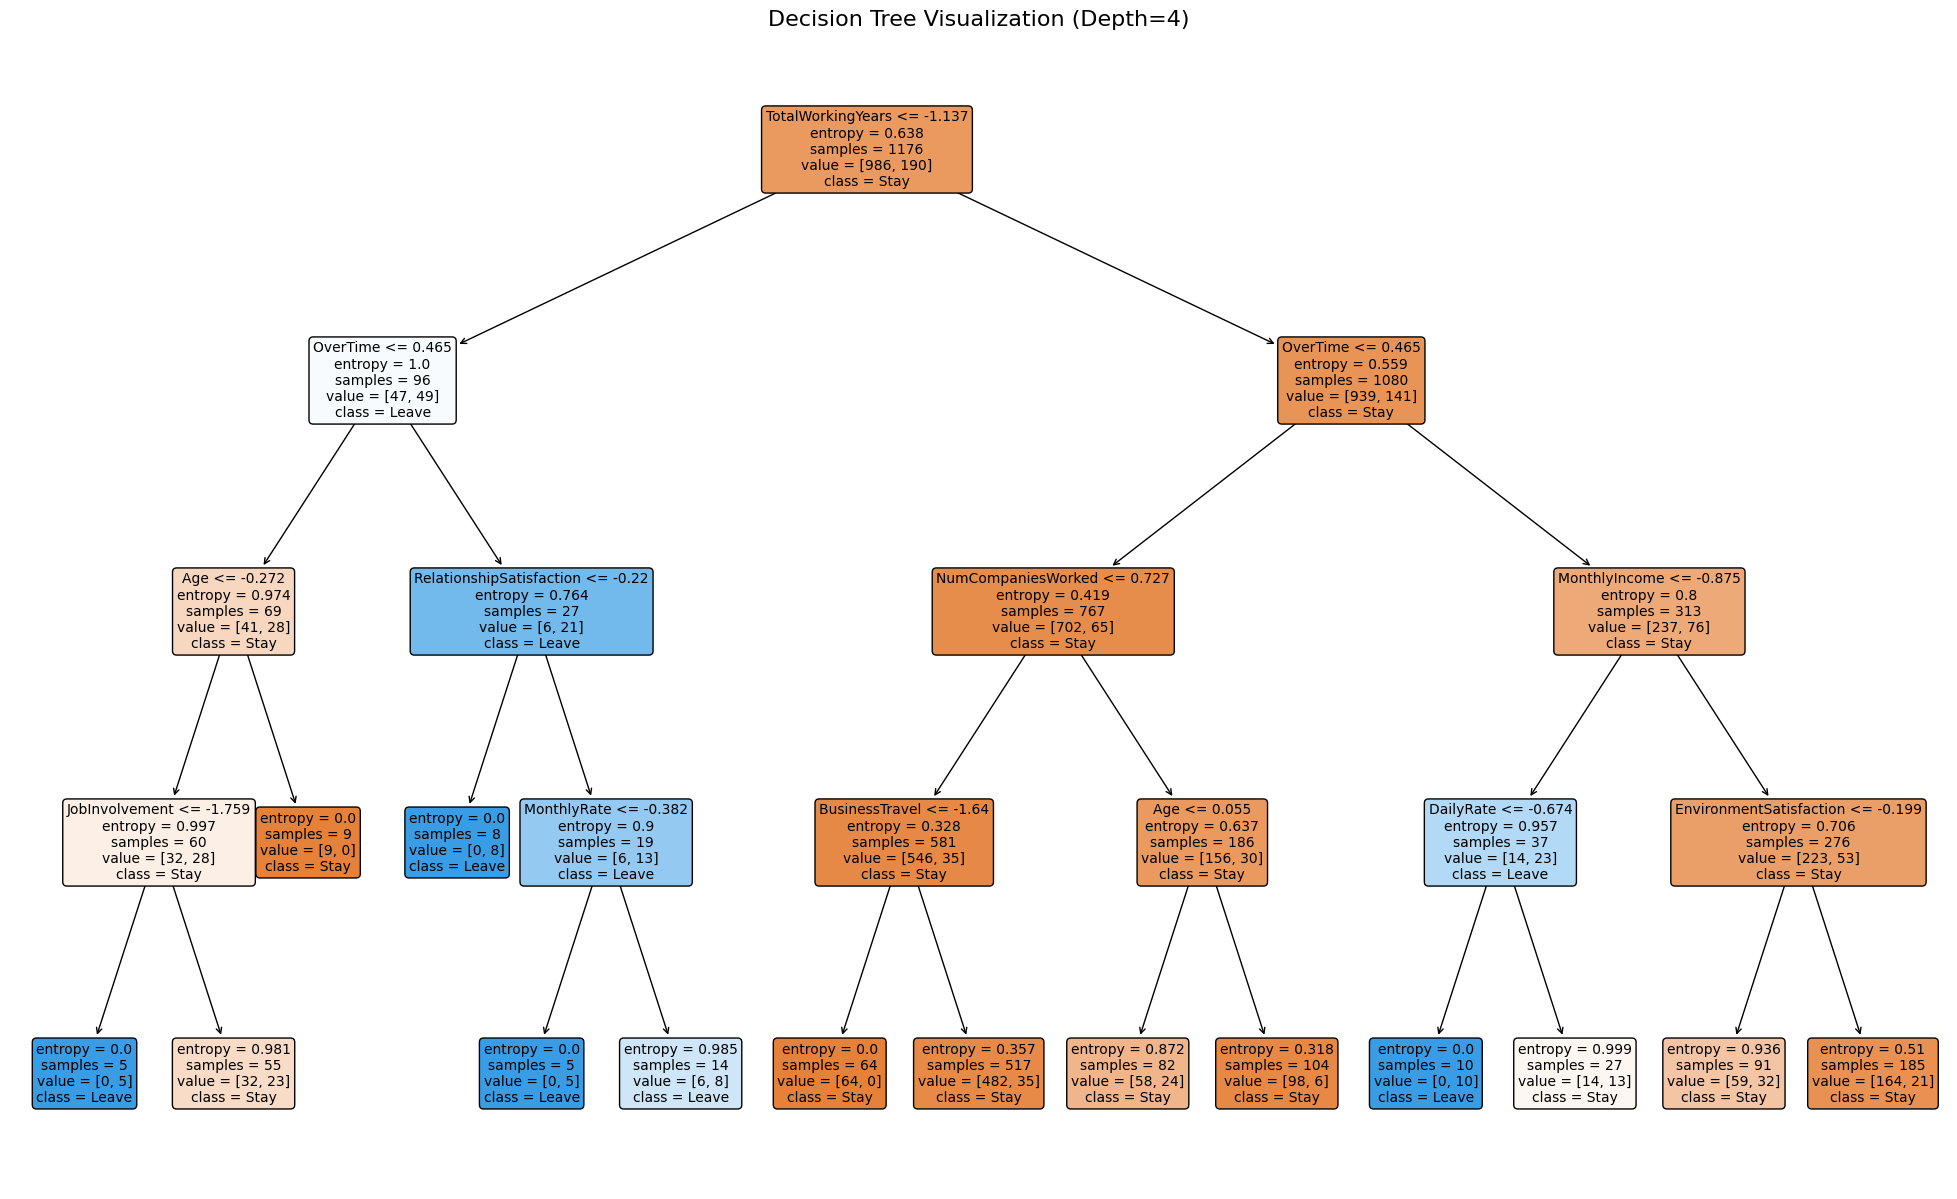

In [4]:
# ============================================
# EMPLOYEE ATTRITION PREDICTION - 2. DECISION TREE CLASSIFIER (KAGGLE VERSION)
# ============================================

# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report, roc_curve, auc
)

# Step 2: Auto-detect and Load Dataset
base_path = "/kaggle/input/employee-attrition"
for file in os.listdir(base_path):
    if file.endswith(".csv"):
        file_path = os.path.join(base_path, file)
        print("✅ File Loaded:", file)
        df = pd.read_csv(file_path)
        break

# Step 3: Basic Info
print("\nDataset Shape:", df.shape)
print("\nMissing Values:", df.isnull().sum().sum())
display(df.head())

# Step 4: Encode Categorical Columns
cat_cols = df.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])
print("\nEncoded Columns:", cat_cols.tolist())

# Step 5: Define Features and Target
X = df.drop("Attrition", axis=1)
y = df["Attrition"]

# Step 6: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Step 7: Feature Scaling (optional for tree)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 8: Build & Train Decision Tree Model
dt_model = DecisionTreeClassifier(
    criterion="entropy", 
    max_depth=4,       # limit depth for clear visualization
    random_state=42
)
dt_model.fit(X_train, y_train)

# Step 9: Predictions
y_pred = dt_model.predict(X_test)
y_prob = dt_model.predict_proba(X_test)[:, 1]

# Step 10: Evaluation
acc = accuracy_score(y_test, y_pred)
print("\n📊 Accuracy:", round(acc, 4))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Step 11: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples')
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Step 12: ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color='darkgreen', lw=2, label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0,1], [0,1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree')
plt.legend(loc="lower right")
plt.show()

# Step 13: Feature Importance
importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': dt_model.feature_importances_
}).sort_values(by='Importance', ascending=False).head(10)

plt.figure(figsize=(8,5))
sns.barplot(x='Importance', y='Feature', data=importances, palette='viridis')
plt.title("Top 10 Important Features - Decision Tree")
plt.show()
print("\nTop 10 Important Features:\n")
display(importances)

# Step 14: Visualize the Tree (Clear)
plt.figure(figsize=(25,15))  # large figure
plot_tree(
    dt_model,
    feature_names=X.columns,
    class_names=['Stay', 'Leave'],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree Visualization (Depth=4)", fontsize=16)
plt.show()


✅ File Loaded: WA_Fn-UseC_-HR-Employee-Attrition.csv

Dataset Shape: (1470, 35)

Missing Values: 0


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2



Encoded Columns: ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']

📊 Accuracy: 0.8367

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.98      0.91       247
           1       0.43      0.06      0.11        47

    accuracy                           0.84       294
   macro avg       0.64      0.52      0.51       294
weighted avg       0.78      0.84      0.78       294



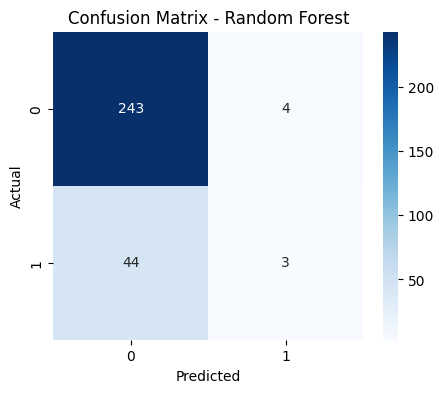

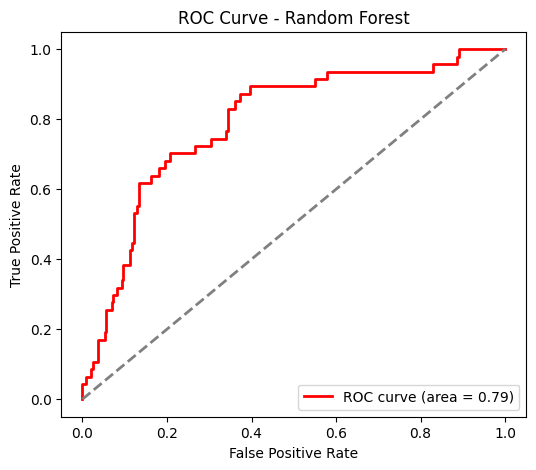

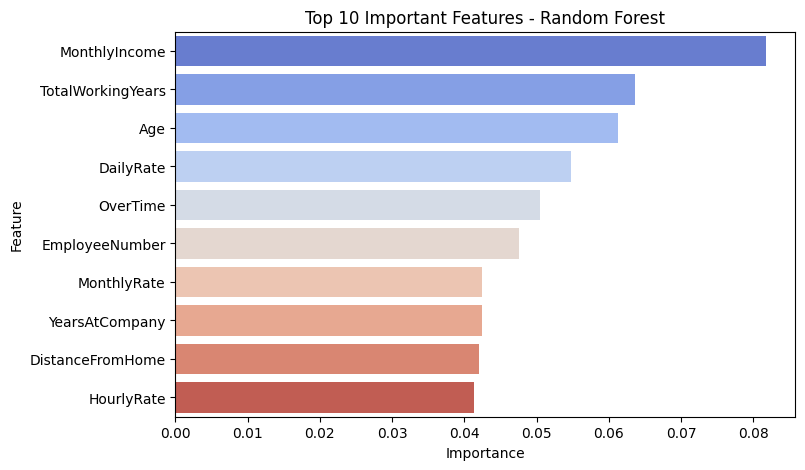


Top 10 Important Features:



,Feature,Importance
17,MonthlyIncome,0.081740
27,TotalWorkingYears,0.063689
0,Age,0.061303
2,DailyRate,0.054798
21,OverTime,0.050497
8,EmployeeNumber,0.047500
18,MonthlyRate,0.042416
30,YearsAtCompany,0.042409
4,DistanceFromHome,0.042070
11,HourlyRate,0.041314


In [5]:
# ============================================
# EMPLOYEE ATTRITION PREDICTION - 3. RANDOM FOREST CLASSIFIER 
# ============================================

# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report, roc_curve, auc
)

# Step 2: Auto-detect and Load Dataset
base_path = "/kaggle/input/employee-attrition"
for file in os.listdir(base_path):
    if file.endswith(".csv"):
        file_path = os.path.join(base_path, file)
        print("✅ File Loaded:", file)
        df = pd.read_csv(file_path)
        break

# Step 3: Basic Info
print("\nDataset Shape:", df.shape)
print("\nMissing Values:", df.isnull().sum().sum())
display(df.head())

# Step 4: Encode Categorical Columns
cat_cols = df.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])
print("\nEncoded Columns:", cat_cols.tolist())

# Step 5: Define Features and Target
X = df.drop("Attrition", axis=1)
y = df["Attrition"]

# Step 6: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Step 7: Feature Scaling (optional for RF)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 8: Build & Train Random Forest Model
rf_model = RandomForestClassifier(
    n_estimators=200,
    criterion='entropy',
    max_depth=8,
    random_state=42
)
rf_model.fit(X_train, y_train)

# Step 9: Predictions
y_pred = rf_model.predict(X_test)
y_prob = rf_model.predict_proba(X_test)[:, 1]

# Step 10: Evaluation
acc = accuracy_score(y_test, y_pred)
print("\n📊 Accuracy:", round(acc, 4))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Step 11: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Step 12: ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color='red', lw=2, label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0,1], [0,1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc="lower right")
plt.show()

# Step 13: Feature Importance
importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False).head(10)

plt.figure(figsize=(8,5))
sns.barplot(x='Importance', y='Feature', data=importances, palette='coolwarm')
plt.title("Top 10 Important Features - Random Forest")
plt.show()
print("\nTop 10 Important Features:\n")
display(importances)


✅ File Loaded: WA_Fn-UseC_-HR-Employee-Attrition.csv

Dataset Shape: (1470, 35)

Missing Values: 0


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2



Encoded Columns: ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']

📊 Accuracy: 0.8639

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92       247
           1       0.67      0.30      0.41        47

    accuracy                           0.86       294
   macro avg       0.77      0.63      0.67       294
weighted avg       0.85      0.86      0.84       294



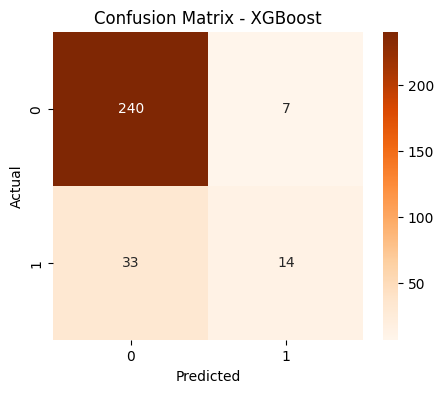

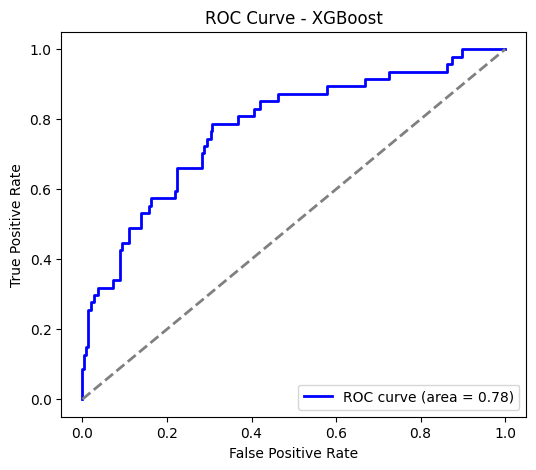

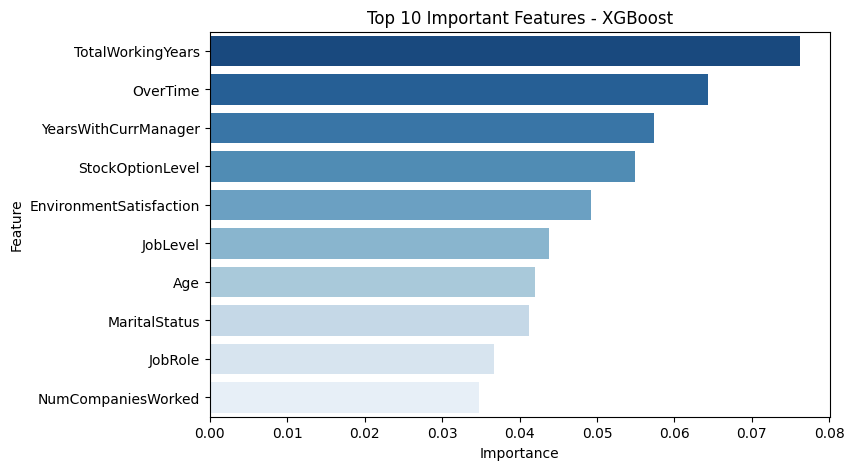


Top 10 Important Features:



,Feature,Importance
27,TotalWorkingYears,0.076225
21,OverTime,0.064371
33,YearsWithCurrManager,0.057307
26,StockOptionLevel,0.054911
9,EnvironmentSatisfaction,0.049245
13,JobLevel,0.043852
0,Age,0.042051
16,MaritalStatus,0.041194
14,JobRole,0.036659
19,NumCompaniesWorked,0.034753


In [6]:
# ============================================
# EMPLOYEE ATTRITION PREDICTION - 4.XGBOOST CLASSIFIER 
# ============================================

# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report, roc_curve, auc
)

from xgboost import XGBClassifier

# Step 2: Auto-detect and Load Dataset
base_path = "/kaggle/input/employee-attrition"
for file in os.listdir(base_path):
    if file.endswith(".csv"):
        file_path = os.path.join(base_path, file)
        print("✅ File Loaded:", file)
        df = pd.read_csv(file_path)
        break

# Step 3: Basic Info
print("\nDataset Shape:", df.shape)
print("\nMissing Values:", df.isnull().sum().sum())
display(df.head())

# Step 4: Encode Categorical Columns
cat_cols = df.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])
print("\nEncoded Columns:", cat_cols.tolist())

# Step 5: Define Features and Target
X = df.drop("Attrition", axis=1)
y = df["Attrition"]

# Step 6: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Step 7: Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 8: Build & Train XGBoost Model
xgb_model = XGBClassifier(
    n_estimators=200,
    max_depth=5,
    learning_rate=0.1,
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42
)
xgb_model.fit(X_train, y_train)

# Step 9: Predictions
y_pred = xgb_model.predict(X_test)
y_prob = xgb_model.predict_proba(X_test)[:, 1]

# Step 10: Evaluation
acc = accuracy_score(y_test, y_pred)
print("\n📊 Accuracy:", round(acc, 4))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Step 11: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges')
plt.title("Confusion Matrix - XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Step 12: ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color='blue', lw=2, label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0,1], [0,1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - XGBoost')
plt.legend(loc="lower right")
plt.show()

# Step 13: Feature Importance
importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': xgb_model.feature_importances_
}).sort_values(by='Importance', ascending=False).head(10)

plt.figure(figsize=(8,5))
sns.barplot(x='Importance', y='Feature', data=importances, palette='Blues_r')
plt.title("Top 10 Important Features - XGBoost")
plt.show()
print("\nTop 10 Important Features:\n")
display(importances)


✅ File Loaded: WA_Fn-UseC_-HR-Employee-Attrition.csv

Dataset Shape: (1470, 35)

Missing Values: 0


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2



Encoded Columns: ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']

📊 Accuracy: 0.8639

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.99      0.92       247
           1       0.77      0.21      0.33        47

    accuracy                           0.86       294
   macro avg       0.82      0.60      0.63       294
weighted avg       0.85      0.86      0.83       294



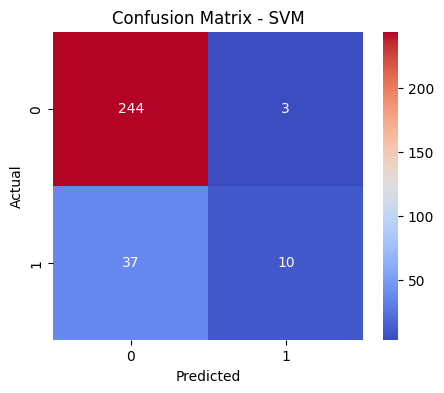

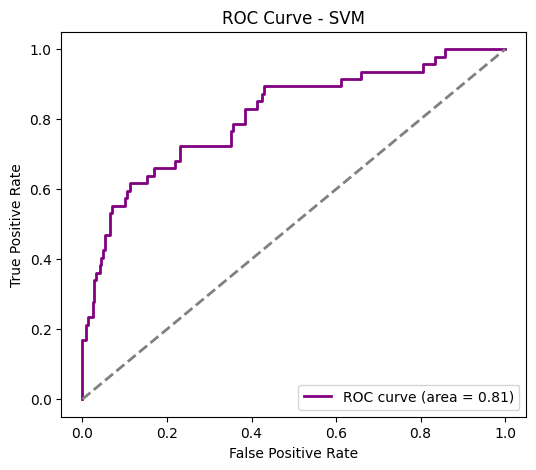


⚠️ Note: Feature importance is not directly available for RBF SVM kernel.


In [7]:
# ============================================
# EMPLOYEE ATTRITION PREDICTION - 5.SVM CLASSIFIER
# ============================================

# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report, roc_curve, auc
)

# Step 2: Auto-detect and Load Dataset
base_path = "/kaggle/input/employee-attrition"
for file in os.listdir(base_path):
    if file.endswith(".csv"):
        file_path = os.path.join(base_path, file)
        print("✅ File Loaded:", file)
        df = pd.read_csv(file_path)
        break

# Step 3: Basic Info
print("\nDataset Shape:", df.shape)
print("\nMissing Values:", df.isnull().sum().sum())
display(df.head())

# Step 4: Encode Categorical Columns
cat_cols = df.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])
print("\nEncoded Columns:", cat_cols.tolist())

# Step 5: Define Features and Target
X = df.drop("Attrition", axis=1)
y = df["Attrition"]

# Step 6: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Step 7: Feature Scaling (SVM needs scaling)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 8: Build & Train SVM Model
svm_model = SVC(
    kernel='rbf',      # radial basis function kernel
    probability=True,  # needed for ROC
    random_state=42
)
svm_model.fit(X_train, y_train)

# Step 9: Predictions
y_pred = svm_model.predict(X_test)
y_prob = svm_model.predict_proba(X_test)[:, 1]

# Step 10: Evaluation
acc = accuracy_score(y_test, y_pred)
print("\n📊 Accuracy:", round(acc, 4))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Step 11: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm')
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Step 12: ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color='purple', lw=2, label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0,1], [0,1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - SVM')
plt.legend(loc="lower right")
plt.show()

# Step 13: (Optional) Feature Importance Approximation
# For linear SVMs, coefficients can be interpreted, but with RBF kernel, not directly interpretable
print("\n⚠️ Note: Feature importance is not directly available for RBF SVM kernel.")


✅ File Loaded: WA_Fn-UseC_-HR-Employee-Attrition.csv

📊 Accuracy: 0.8401

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.99      0.91       247
           1       0.50      0.04      0.08        47

    accuracy                           0.84       294
   macro avg       0.67      0.52      0.50       294
weighted avg       0.79      0.84      0.78       294



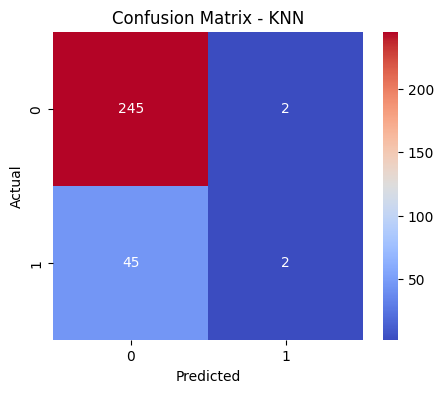

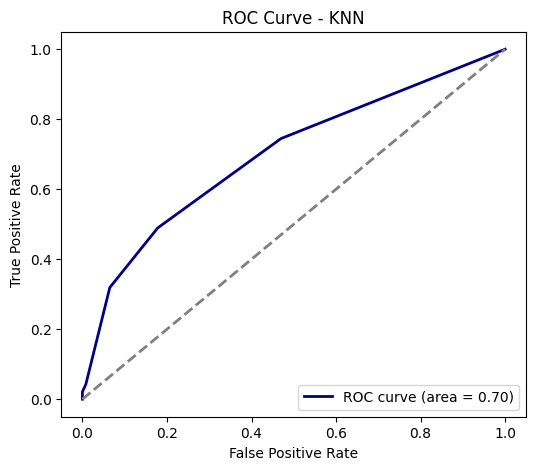

In [9]:
# ============================================
# EMPLOYEE ATTRITION PREDICTION - 6. KNN CLASSIFIER 
# ============================================

# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

# Step 2: Load Dataset
base_path = "/kaggle/input/employee-attrition"
for file in os.listdir(base_path):
    if file.endswith(".csv"):
        file_path = os.path.join(base_path, file)
        print("✅ File Loaded:", file)
        df = pd.read_csv(file_path)
        break

# Step 3: Encode Categorical Columns
cat_cols = df.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

# Step 4: Features & Target
X = df.drop("Attrition", axis=1)
y = df["Attrition"]

# Step 5: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Step 6: Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 7: Build & Train KNN Model
knn_model = KNeighborsClassifier(n_neighbors=7)  # you can tune n_neighbors
knn_model.fit(X_train, y_train)

# Step 8: Predictions
y_pred = knn_model.predict(X_test)
y_prob = knn_model.predict_proba(X_test)[:,1]

# Step 9: Evaluation
acc = accuracy_score(y_test, y_pred)
print("\n📊 Accuracy:", round(acc,4))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Step 10: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm')
plt.title("Confusion Matrix - KNN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Step 11: ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color='darkblue', lw=2, label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0,1], [0,1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - KNN')
plt.legend(loc="lower right")
plt.show()


✅ File Loaded: WA_Fn-UseC_-HR-Employee-Attrition.csv

📊 Accuracy: 0.8333

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.96      0.91       247
           1       0.44      0.15      0.22        47

    accuracy                           0.83       294
   macro avg       0.65      0.56      0.56       294
weighted avg       0.79      0.83      0.80       294



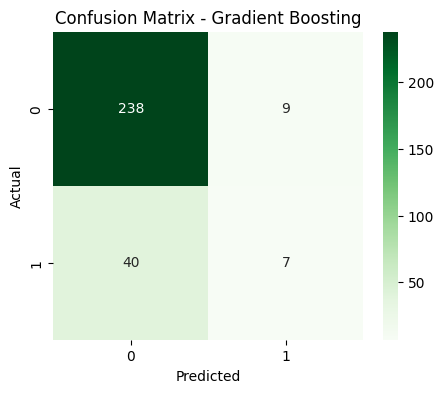

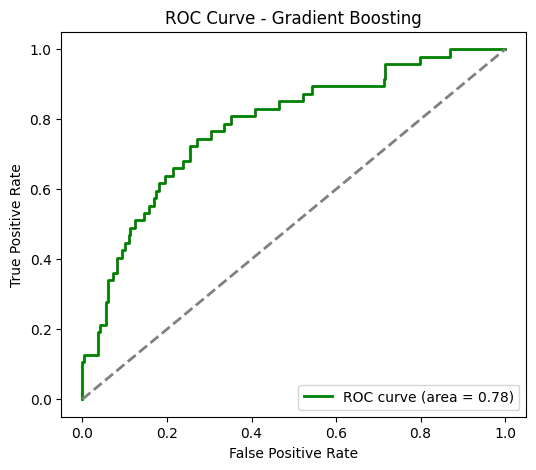

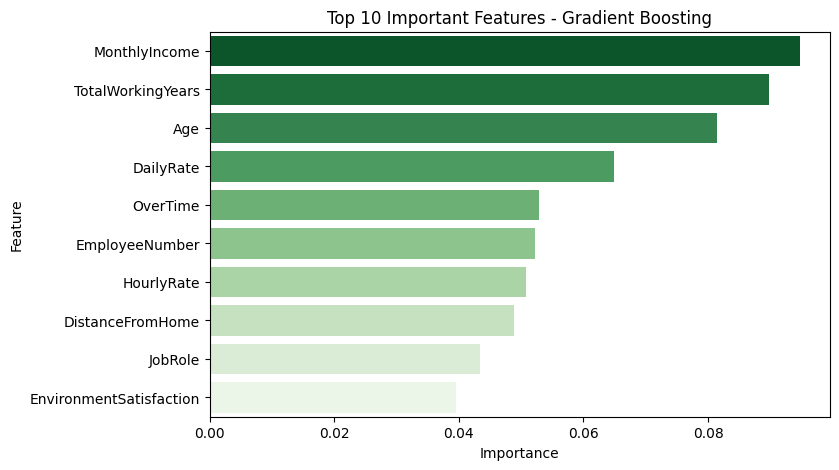


Top 10 Important Features:



,Feature,Importance
17,MonthlyIncome,0.094789
27,TotalWorkingYears,0.089741
0,Age,0.081422
2,DailyRate,0.064958
21,OverTime,0.052809
8,EmployeeNumber,0.052294
11,HourlyRate,0.050740
4,DistanceFromHome,0.048895
14,JobRole,0.043330
9,EnvironmentSatisfaction,0.039554


In [10]:
# ============================================
# EMPLOYEE ATTRITION PREDICTION - GRADIENT BOOSTING CLASSIFIER
# ============================================

# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

# Step 2: Load Dataset
base_path = "/kaggle/input/employee-attrition"
for file in os.listdir(base_path):
    if file.endswith(".csv"):
        file_path = os.path.join(base_path, file)
        print("✅ File Loaded:", file)
        df = pd.read_csv(file_path)
        break

# Step 3: Encode Categorical Columns
cat_cols = df.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

# Step 4: Features & Target
X = df.drop("Attrition", axis=1)
y = df["Attrition"]

# Step 5: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Step 6: Feature Scaling (optional)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 7: Build & Train Gradient Boosting Model
gbm_model = GradientBoostingClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)
gbm_model.fit(X_train, y_train)

# Step 8: Predictions
y_pred = gbm_model.predict(X_test)
y_prob = gbm_model.predict_proba(X_test)[:,1]

# Step 9: Evaluation
acc = accuracy_score(y_test, y_pred)
print("\n📊 Accuracy:", round(acc,4))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Step 10: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Gradient Boosting")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Step 11: ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color='green', lw=2, label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0,1], [0,1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Gradient Boosting')
plt.legend(loc="lower right")
plt.show()

# Step 12: Feature Importance
importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': gbm_model.feature_importances_
}).sort_values(by='Importance', ascending=False).head(10)

plt.figure(figsize=(8,5))
sns.barplot(x='Importance', y='Feature', data=importances, palette='Greens_r')
plt.title("Top 10 Important Features - Gradient Boosting")
plt.show()
print("\nTop 10 Important Features:\n")
display(importances)


✅ File Loaded: WA_Fn-UseC_-HR-Employee-Attrition.csv

✅ 7-Model Comparison Table:



,Model,Accuracy,F1 Score,ROC-AUC
0,Logistic Regression,0.8741,0.4932,0.8047
1,Decision Tree,0.8469,0.2105,0.7119
2,Random Forest,0.8367,0.1111,0.7913
3,XGBoost,0.8639,0.4118,0.7785
4,SVM,0.8639,0.3333,0.8109
5,KNN,0.8401,0.0784,0.6989
6,Gradient Boosting,0.8333,0.2222,0.7811


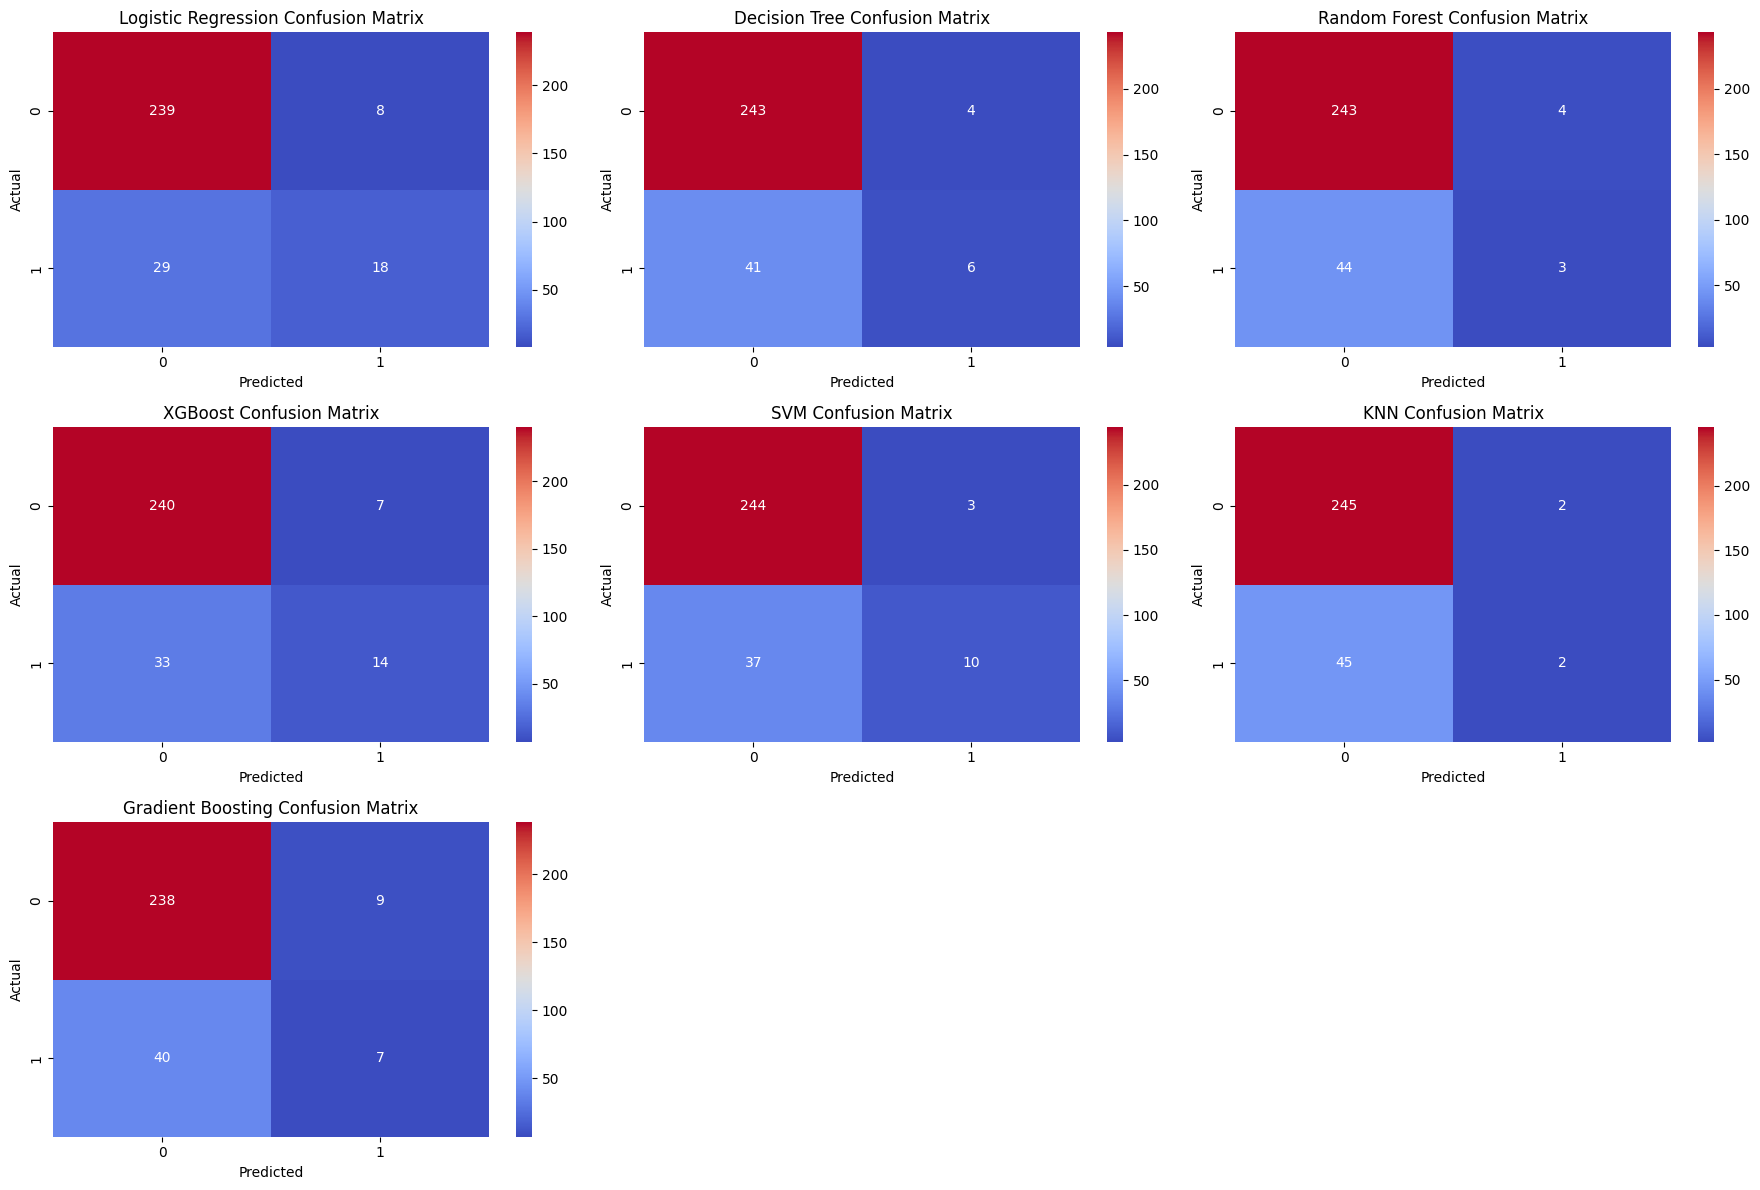

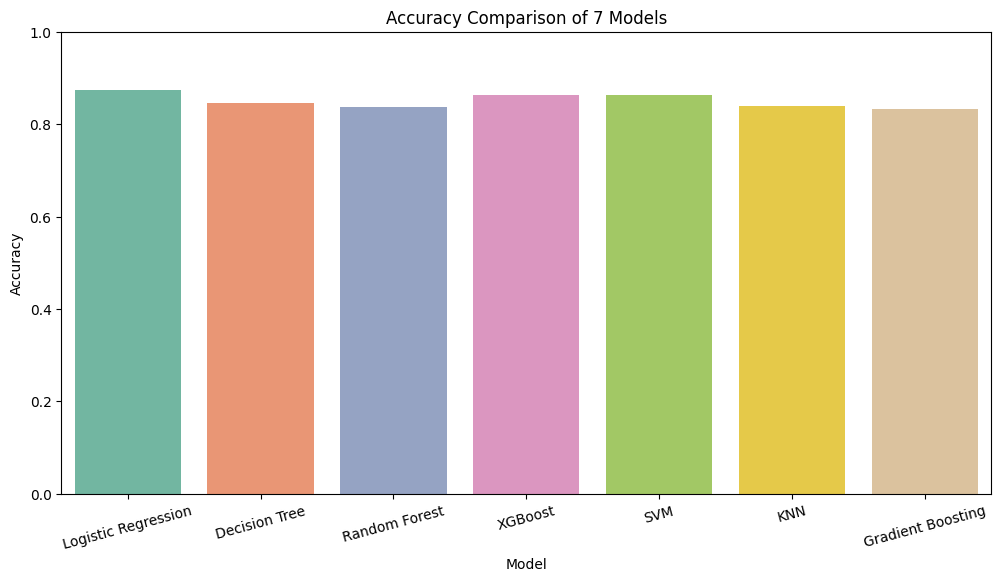

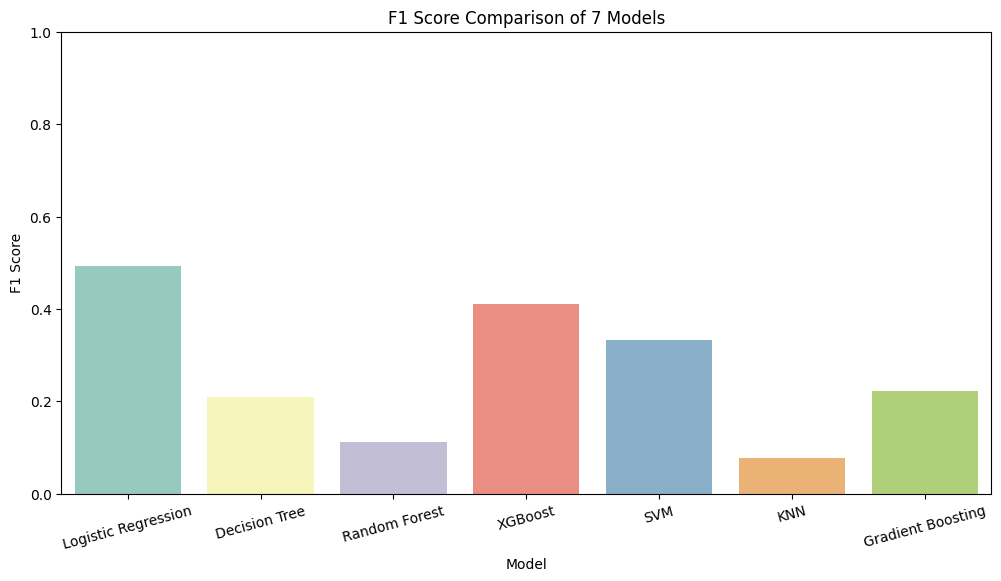

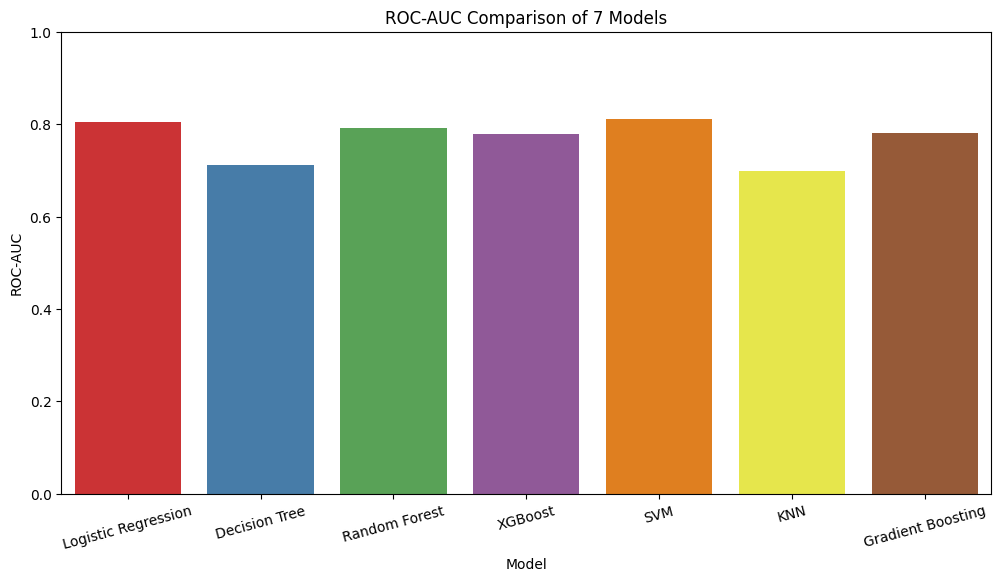

In [14]:
# ============================================
# EMPLOYEE ATTRITION PREDICTION - 7 MODEL COMPARISON WITH CONFUSION MATRICES
# ============================================

# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix

# Step 2: Load Dataset
base_path = "/kaggle/input/employee-attrition"
for file in os.listdir(base_path):
    if file.endswith(".csv"):
        file_path = os.path.join(base_path, file)
        print("✅ File Loaded:", file)
        df = pd.read_csv(file_path)
        break

# Step 3: Encode Categorical Columns
cat_cols = df.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

# Step 4: Features & Target
X = df.drop("Attrition", axis=1)
y = df["Attrition"]

# Step 5: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Step 6: Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 7: Define Models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(criterion="entropy", max_depth=4, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=200, max_depth=8, criterion="entropy", random_state=42),
    "XGBoost": XGBClassifier(n_estimators=200, max_depth=5, learning_rate=0.1, objective='binary:logistic', eval_metric='logloss', use_label_encoder=False, random_state=42),
    "SVM": SVC(kernel='rbf', probability=True, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=7),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42)
}

# Step 8: Train Models, Evaluate, and Store Confusion Matrices
results = []
cms = {}  # store confusion matrices

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1] if hasattr(model, "predict_proba") else model.decision_function(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_prob)
    
    results.append({"Model": name, "Accuracy": round(acc,4), "F1 Score": round(f1,4), "ROC-AUC": round(roc,4)})
    
    cms[name] = confusion_matrix(y_test, y_pred)

# Step 9: Display Comparison Table
results_df = pd.DataFrame(results)
print("\n✅ 7-Model Comparison Table:\n")
display(results_df)

# Step 10: Plot Confusion Matrices in Grid
plt.figure(figsize=(18,12))
for i, (name, cm) in enumerate(cms.items(), 1):
    plt.subplot(3,3,i)
    sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm')
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# Step 11: Visualization - Accuracy, F1 Score, ROC-AUC
metrics = ['Accuracy', 'F1 Score', 'ROC-AUC']
palettes = ['Set2', 'Set3', 'Set1']

for metric, palette in zip(metrics, palettes):
    plt.figure(figsize=(12,6))
    sns.barplot(x='Model', y=metric, data=results_df, palette=palette)
    plt.title(f"{metric} Comparison of 7 Models")
    plt.ylabel(metric)
    plt.ylim(0,1)
    plt.xticks(rotation=15)
    plt.show()
